In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('data/Cleaned_Tweet_data.csv')

In [3]:
data.head()

,tweet_id,text,user_name,created_at,location,Country,timestamp_ms,quote_count,reply_count,retweet_count,favorite_count,hashtags
0,1.250010e+18,RT @eileeniorio: Talking to the @BBCNews @Bil...,ChrisJGodlewski,Tue Apr 14 10:53:12 +0000 2020,"Alsace, France",France,1.586860e+12,0,0,0,0,COVID19
1,1.250010e+18,My tribute for today. Congratulations on exec...,bearhugz25,Tue Apr 14 10:53:12 +0000 2020,Philippines,Philippines,1.586860e+12,0,0,0,0,NaN
2,1.250010e+18,RT @Brevesdepresse: ⚡🇲🇫FLASH - Considérés comm...,Reazy92i,Tue Apr 14 10:53:12 +0000 2020,"Poitiers, France",France,1.586860e+12,0,0,0,0,infirmiers
3,1.250010e+18,Ok @opodo I'm now at the end of my tether. Had...,Lesley_Allen_,Tue Apr 14 10:53:12 +0000 2020,Bangor Co Down,Bangladesh,1.586860e+12,0,0,0,0,NaN
4,1.250010e+18,RT @PresidenciaSV: Este es el Decreto Ejecutiv...,tecmel1,Tue Apr 14 10:53:12 +0000 2020,el salvador,El Salvador,1.586860e+12,0,0,0,0,NaN


In [4]:
data.describe()

,tweet_id,timestamp_ms,quote_count,reply_count,retweet_count,favorite_count
count,6.520000e+02,6.520000e+02,652.0,652.0,652.0,652.0
mean,1.250010e+18,1.586860e+12,0.0,0.0,0.0,0.0
std,1.332222e+04,0.000000e+00,0.0,0.0,0.0,0.0
min,1.250010e+18,1.586860e+12,0.0,0.0,0.0,0.0
25%,1.250010e+18,1.586860e+12,0.0,0.0,0.0,0.0
50%,1.250010e+18,1.586860e+12,0.0,0.0,0.0,0.0
75%,1.250010e+18,1.586860e+12,0.0,0.0,0.0,0.0
max,1.250010e+18,1.586860e+12,0.0,0.0,0.0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        652 non-null    float64
 1   text            652 non-null    object 
 2   user_name       652 non-null    object 
 3   created_at      652 non-null    object 
 4   location        652 non-null    object 
 5   Country         647 non-null    object 
 6   timestamp_ms    652 non-null    float64
 7   quote_count     652 non-null    int64  
 8   reply_count     652 non-null    int64  
 9   retweet_count   652 non-null    int64  
 10  favorite_count  652 non-null    int64  
 11  hashtags        336 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 61.2+ KB


## Drop the null values

In [6]:
data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 651
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        334 non-null    float64
 1   text            334 non-null    object 
 2   user_name       334 non-null    object 
 3   created_at      334 non-null    object 
 4   location        334 non-null    object 
 5   Country         334 non-null    object 
 6   timestamp_ms    334 non-null    float64
 7   quote_count     334 non-null    int64  
 8   reply_count     334 non-null    int64  
 9   retweet_count   334 non-null    int64  
 10  favorite_count  334 non-null    int64  
 11  hashtags        334 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 33.9+ KB


In [8]:
data.describe(include='O')

,text,user_name,created_at,location,Country,hashtags
count,334,334,334,334,334,334
unique,295,321,30,289,112,141
top,RT @Brevesdepresse: ⚡🇲🇫FLASH - Considérés comm...,siddhsingatiya,Tue Apr 14 10:53:21 +0000 2020,India,India,COVID19
freq,10,5,20,8,32,115


# Show top  hastags for covid 19

In [9]:
data['Country'].value_counts()

India                32
UK                   16
France               12
\nSouth America\n    11
Madagascar            7
                     ..
Burundi               1
World                 1
Botswana              1
Western Sahara        1
Cyprus                1
Name: Country, Length: 112, dtype: int64

### Popular hashtag in UK

In [10]:
data_India=data[data['Country']=='UK']
top_has_tag=data_India['hashtags'].value_counts().sort_values(ascending=False)[0:5]
data_hastag=pd.DataFrame(data=top_has_tag.values,index=top_has_tag.index,columns=['hashtag'])


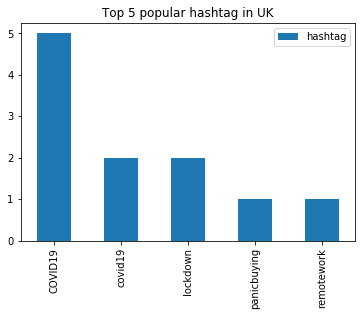

In [11]:
data_hastag.plot(kind='bar')
plt.title('Top 5 popular hashtag in UK')
plt.show()


In [12]:
## Top 5 popular hashtag In India

In [13]:
data_India=data[data['Country']=='India']

In [14]:
top_has_tag=data_India['hashtags'].value_counts().sort_values(ascending=False)[0:5]

In [15]:
top_has_tag.values

array([6, 3, 3, 1, 1])

In [16]:
data_hastag=pd.DataFrame(data=top_has_tag.values,index=top_has_tag.index,columns=['hashtag'])

In [17]:
data_hastag.head()

,hashtag
COVID19,6
Lockdown,3
Covid19,3
tax,1
Robots,1


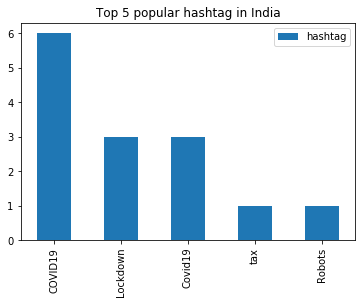

In [18]:
data_hastag.plot(kind='bar')
plt.title('Top 5 popular hashtag in India')
plt.show()
